In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
my_data=pd.read_csv("train.csv")
df=my_data.copy()
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
print(df.shape)

(614, 13)


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## SEPARATION DES VARIABLES CATEGORIELLES ET NUMERIQUES

In [8]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('les variables catégoriques sont:',var_cat)
print('les variables numériques sont:',var_num)

les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [16]:
df.isnull().sum().sort_values(ascending=True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [18]:
# supprimer les valeurs manquantes coté variables catégoriques le mode 
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [20]:
#supprimer les valeurs manquantes côté variables numeriques on les remmplces par la mediane ou la moyenne
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [22]:
df.isnull().sum().sort_values(ascending=True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## ANALYSE UNIVARIÉ 

In [25]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [27]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable Gender'}, xlabel='Gender'>

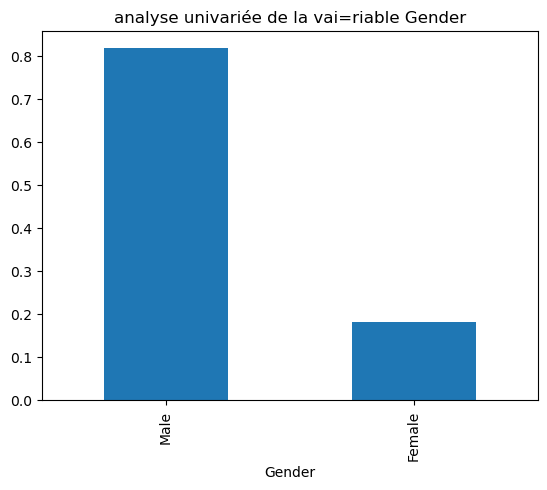

In [29]:
df['Gender'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable Gender")

In [30]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [33]:
df['Married'].value_counts(normalize=True)*100

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable Married'}, xlabel='Married'>

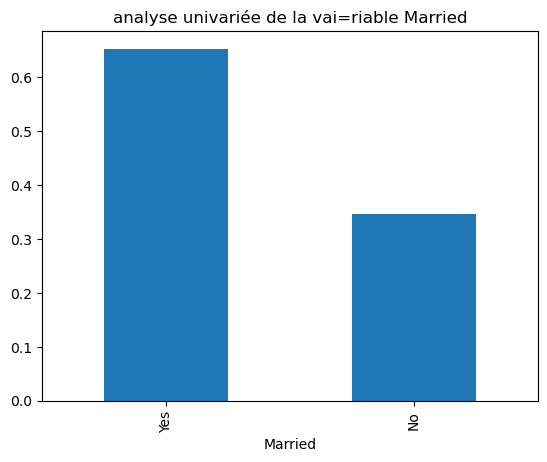

In [35]:
df['Married'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable Married")

In [37]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [39]:
df['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable Dependents'}, xlabel='Dependents'>

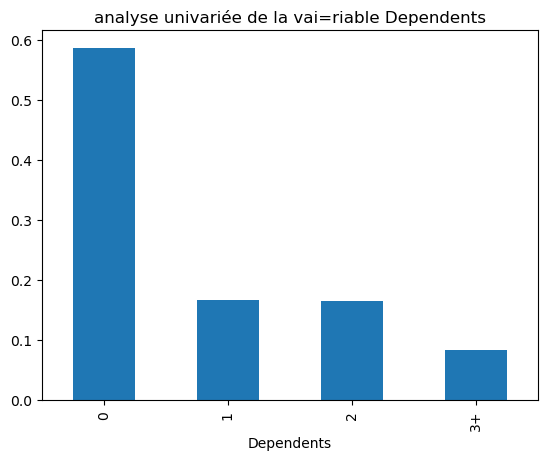

In [41]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable Dependents")

In [43]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [45]:
df['Education'].value_counts(normalize=True)*100

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable Education'}, xlabel='Education'>

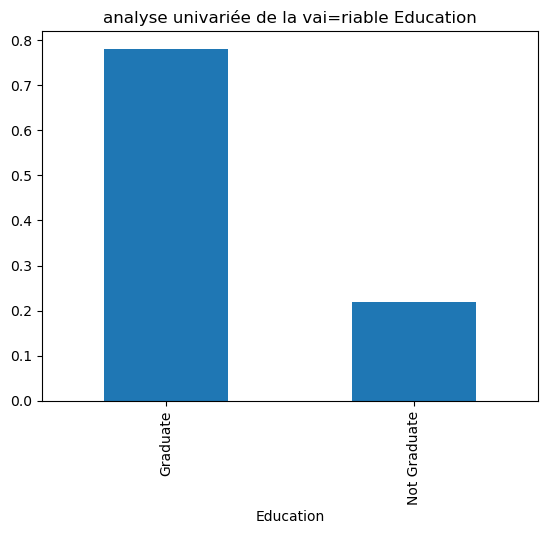

In [47]:
df['Education'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable Education")

In [48]:
df['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [51]:
df['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable Self_Employed'}, xlabel='Self_Employed'>

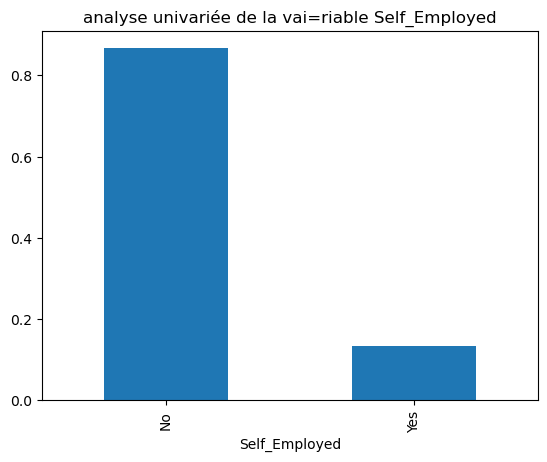

In [53]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable Self_Employed")

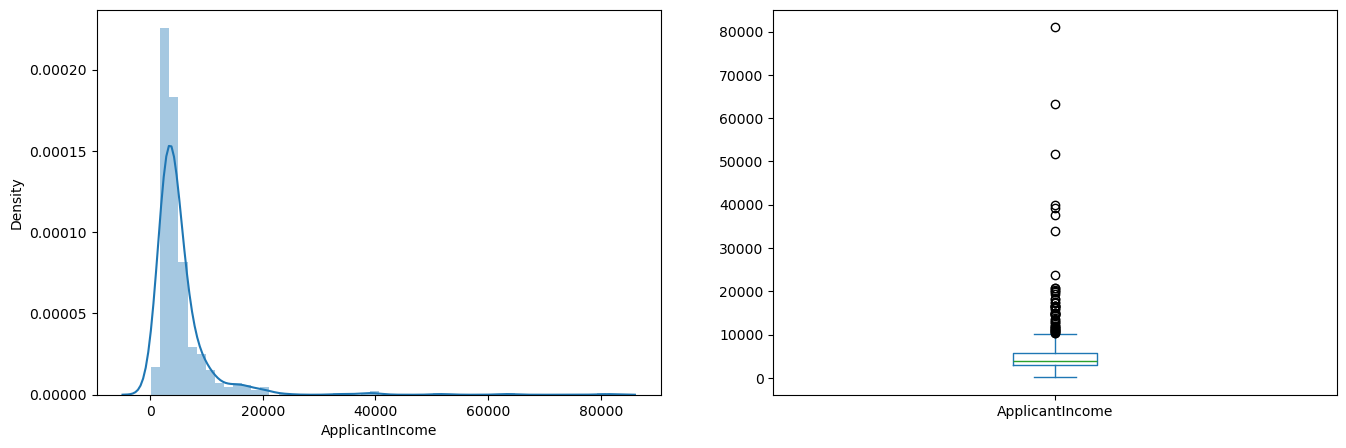

In [55]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

In [56]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [59]:
df['ApplicantIncome'].value_counts(normalize=True)*100

ApplicantIncome
2500    1.465798
4583    0.977199
6000    0.977199
2600    0.977199
3333    0.814332
          ...   
3244    0.162866
4408    0.162866
3917    0.162866
3992    0.162866
7583    0.162866
Name: proportion, Length: 505, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable ApplicantIncome'}, xlabel='ApplicantIncome'>

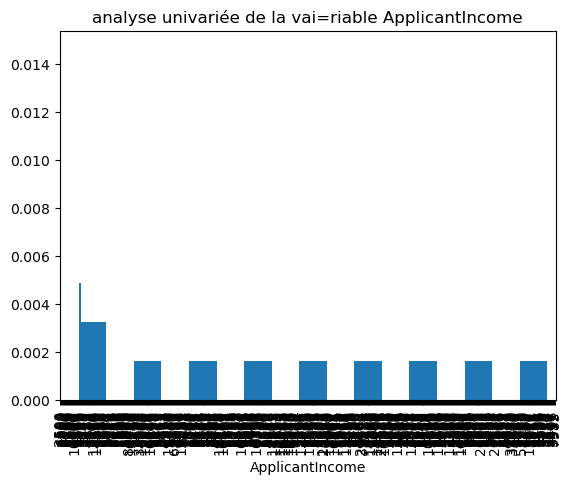

In [61]:
df['ApplicantIncome'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable ApplicantIncome")

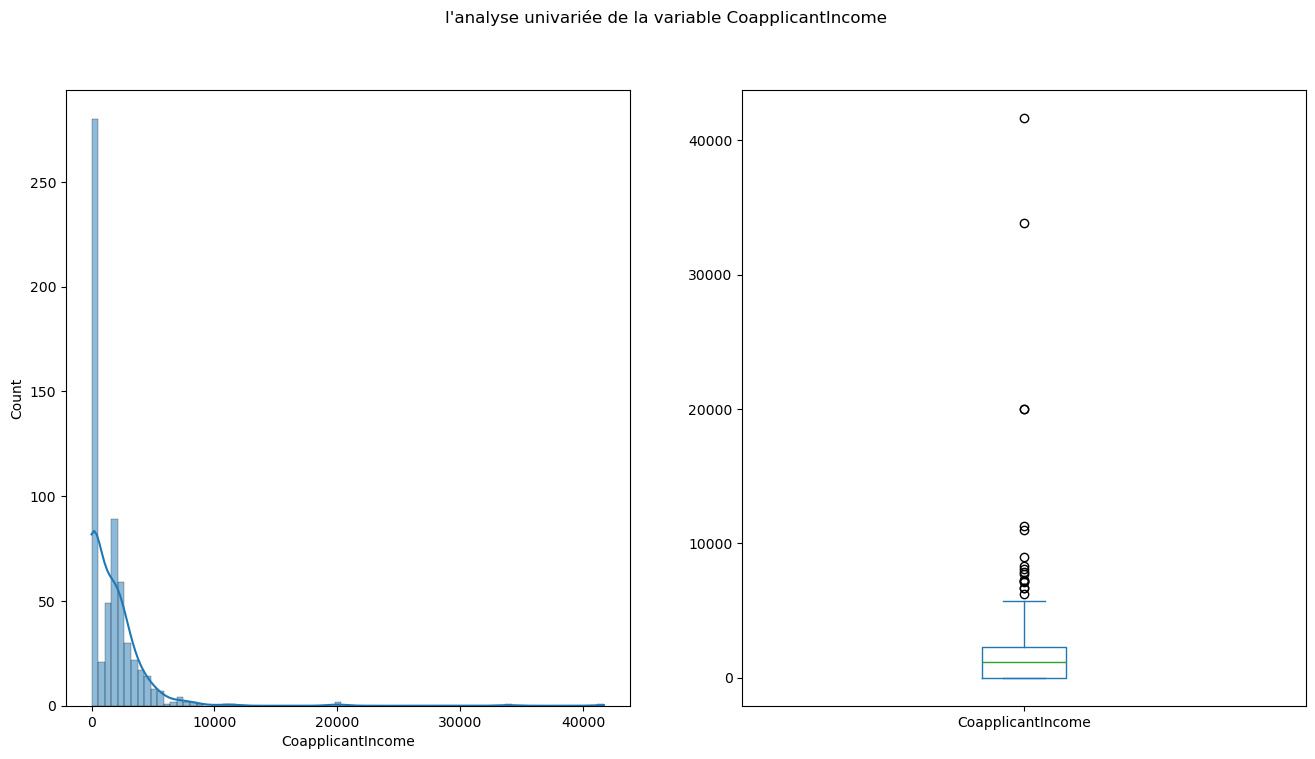

In [62]:
plt.figure(1)
plt.subplot(121)
sns.histplot(df['CoapplicantIncome'],kde=True)
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,8))
plt.suptitle("l'analyse univariée de la variable CoapplicantIncome")
plt.show()

In [63]:
df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [64]:
df['CoapplicantIncome'].value_counts(normalize=True)*100

CoapplicantIncome
0.0       44.462541
2500.0     0.814332
2083.0     0.814332
1666.0     0.814332
2250.0     0.488599
            ...    
2791.0     0.162866
1010.0     0.162866
1695.0     0.162866
2598.0     0.162866
240.0      0.162866
Name: proportion, Length: 287, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riable CoapplicantIncome'}, xlabel='CoapplicantIncome'>

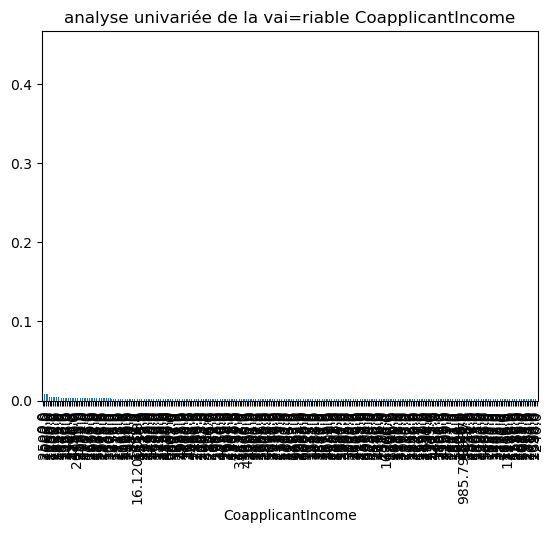

In [65]:
df['CoapplicantIncome'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riable CoapplicantIncome")

In [66]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [67]:
df['Property_Area'].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riableProperty_Area'}, xlabel='Property_Area'>

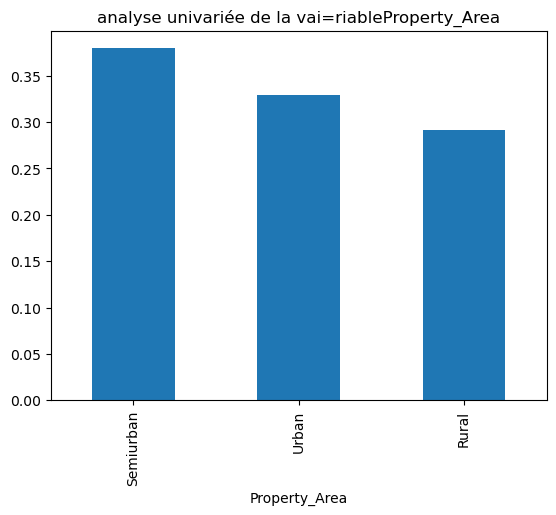

In [68]:
df['Property_Area'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riableProperty_Area")

In [69]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [70]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la vai=riableLoan_Status'}, xlabel='Loan_Status'>

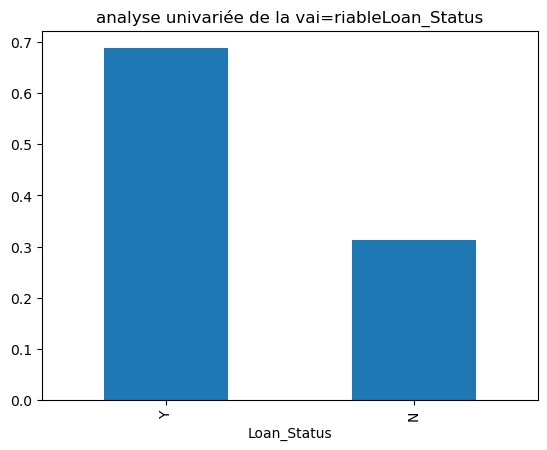

In [71]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title="analyse univariée de la vai=riableLoan_Status")

In [72]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [73]:
df['Married'].value_counts(normalize=True)*100

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Married'}, xlabel='Married'>

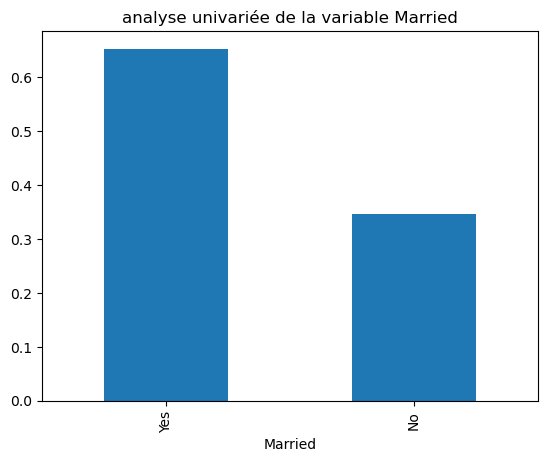

In [75]:
df['Married'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Married")

In [79]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [80]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Gender'}, xlabel='Gender'>

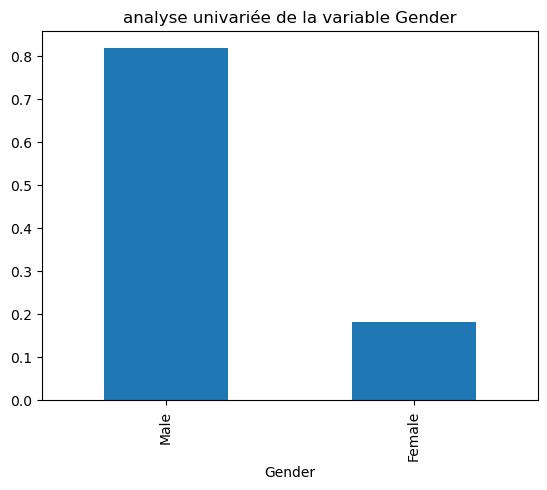

In [81]:
df['Gender'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Gender")

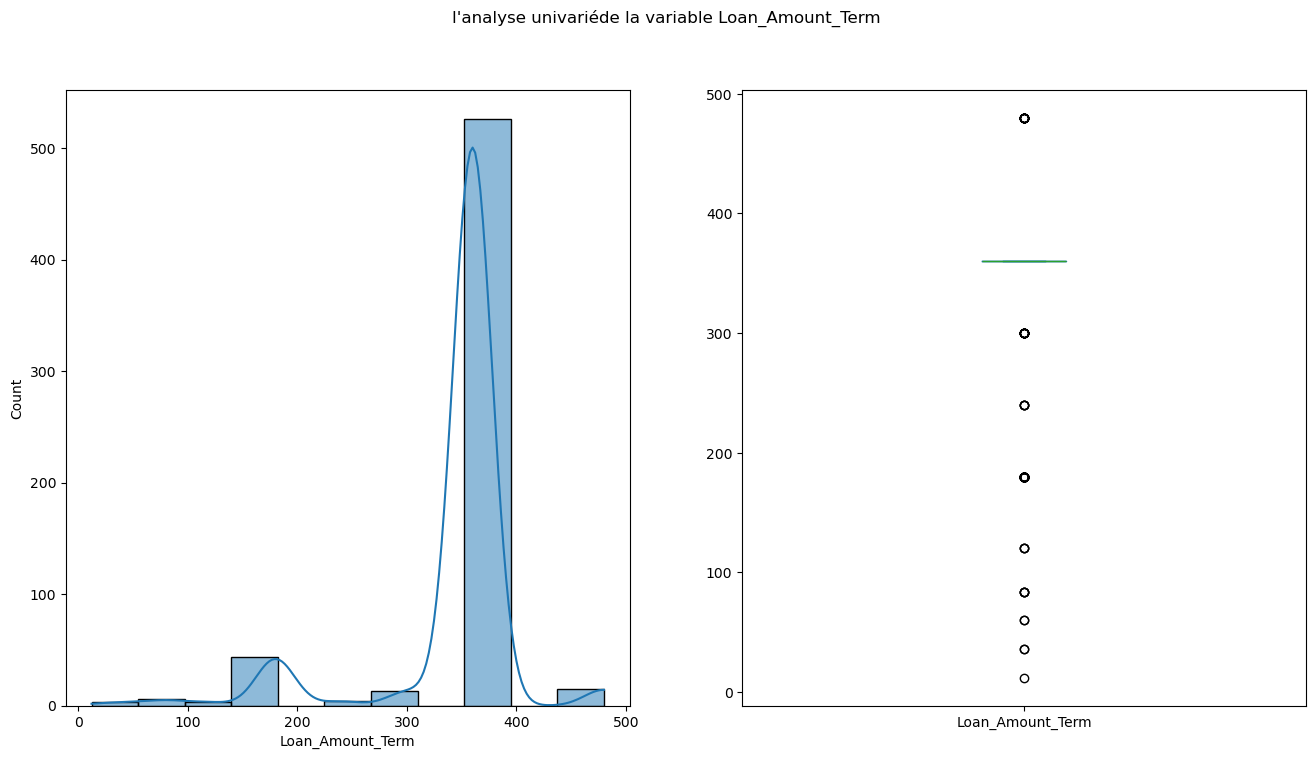

In [82]:
plt.figure(1)
plt.subplot(121)
sns.histplot(df['Loan_Amount_Term'],kde=True)
plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,8))
plt.suptitle("l'analyse univariéde la variable Loan_Amount_Term")
plt.show()

In [83]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [84]:
df['Loan_Amount_Term'].value_counts(normalize=True)*100

Loan_Amount_Term
360.0    85.667752
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

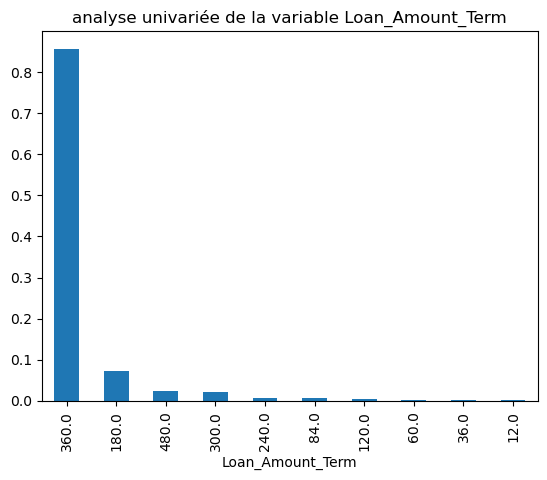

In [85]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Loan_Amount_Term")

In [89]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [95]:
df['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Dependents'}, xlabel='Dependents'>

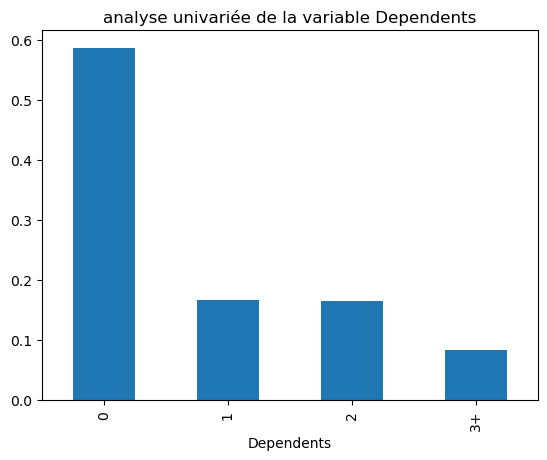

In [98]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Dependents")

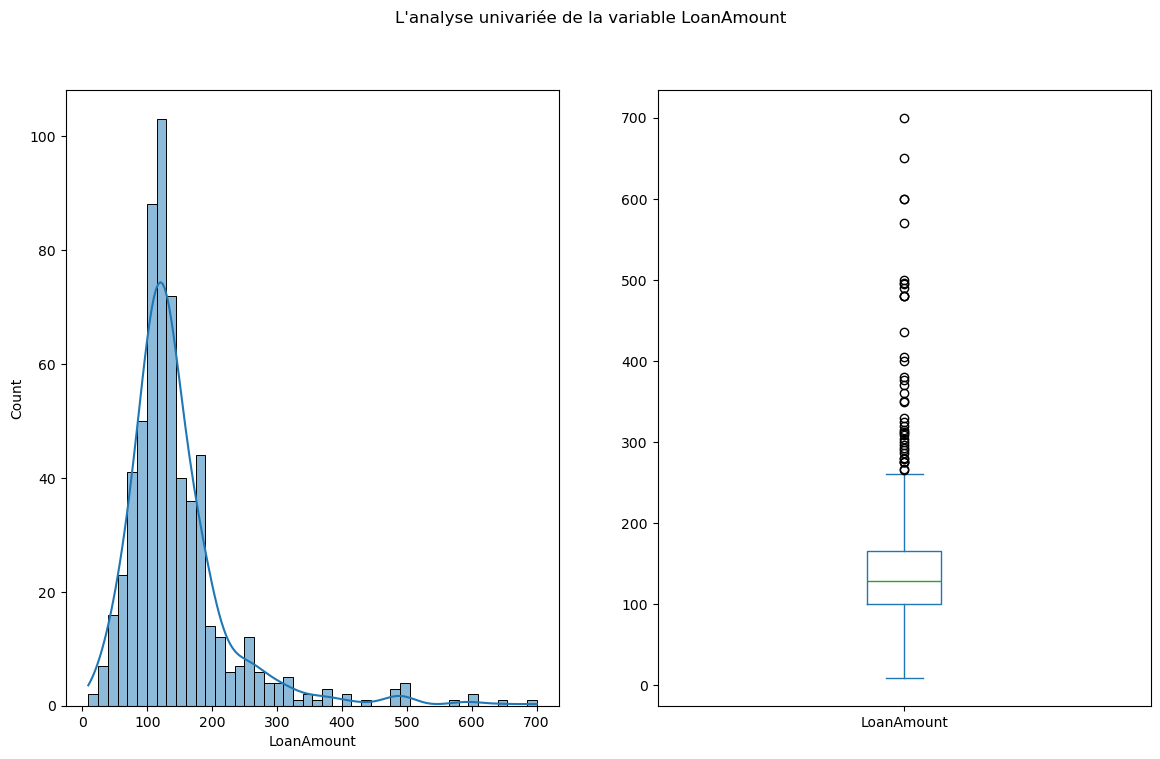

In [102]:
plt.figure(figsize=(14, 8))

# Premier graphique : histogramme avec sns.histplot() dans le subplot 121
plt.subplot(121)
sns.histplot(df['LoanAmount'], kde=True)

# Deuxième graphique : boîte à moustaches (boxplot) dans le subplot 122
plt.subplot(122)
df['LoanAmount'].plot.box()

# Ajouter un titre général pour les deux graphiques
plt.suptitle("L'analyse univariée de la variable LoanAmount")

# Afficher les graphiques
plt.show()

In [106]:
df['LoanAmount'].value_counts()

LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [108]:
df['LoanAmount'].value_counts(normalize=True)*100

LoanAmount
128.0    5.374593
120.0    3.257329
110.0    2.768730
100.0    2.442997
160.0    1.954397
           ...   
240.0    0.162866
214.0    0.162866
59.0     0.162866
166.0    0.162866
253.0    0.162866
Name: proportion, Length: 203, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable LoanAmount'}, xlabel='LoanAmount'>

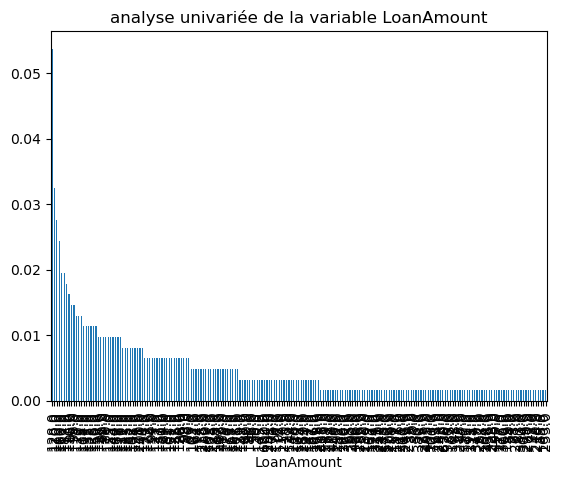

In [111]:
df['LoanAmount'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable LoanAmount")

In [113]:
df['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [114]:
df['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Self_Employed'}, xlabel='Self_Employed'>

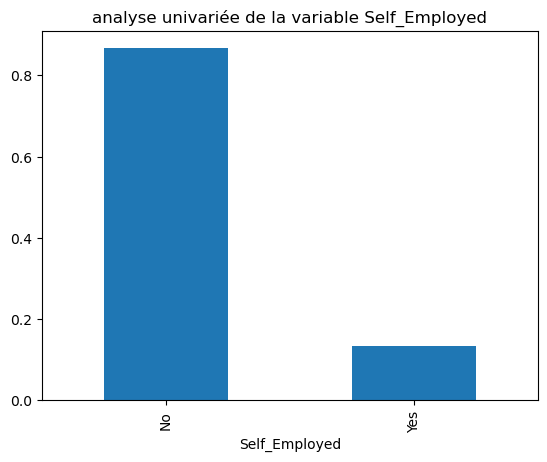

In [118]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Self_Employed")

In [119]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [120]:
df['Credit_History'].value_counts(normalize=True)*100

Credit_History
1.0    85.504886
0.0    14.495114
Name: proportion, dtype: float64

<Axes: title={'center': 'analyse univariée de la variable Credit_History'}, xlabel='Credit_History'>

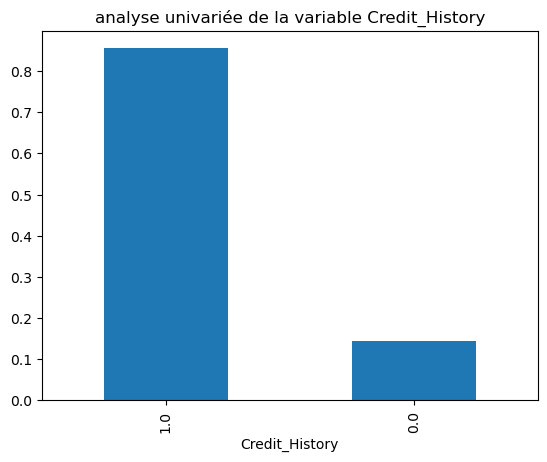

In [121]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title="analyse univariée de la variable Credit_History")

## ANALYSE BIVARIÉE 

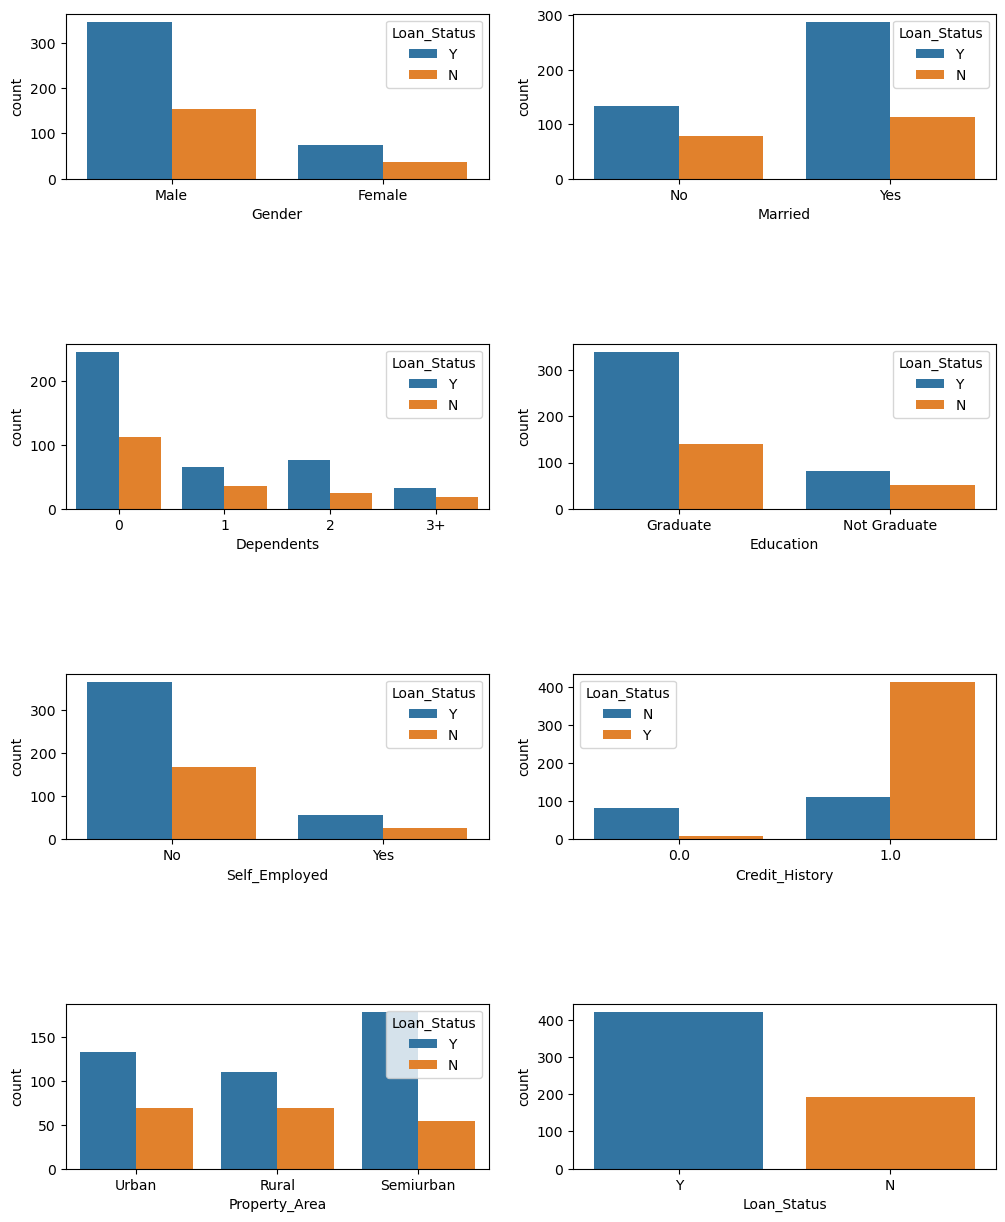

In [138]:
# les variables catégoriques
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

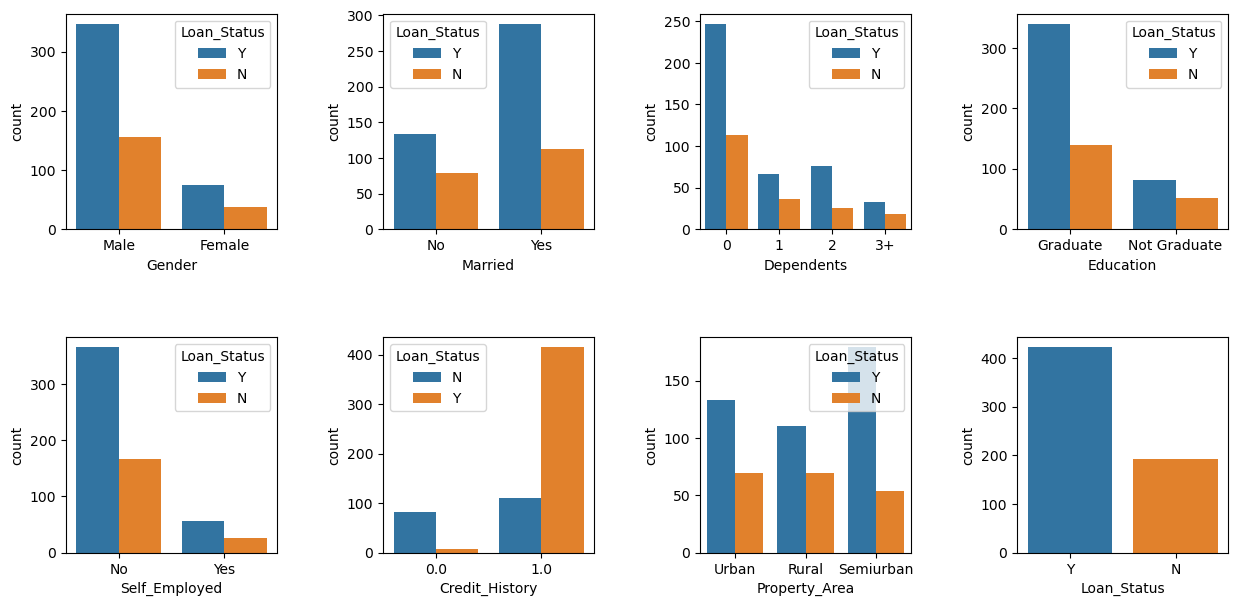

In [150]:
figure, axes = plt.subplots(2, 4, figsize=(15, 7))
for index, column in enumerate(var_cat):
    row, col = index // 4, index % 4
    sns.countplot(x=column, data=df, hue='Loan_Status', ax=axes[row, col])

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## MATRICE DE CONFUSION